In [1]:
from src.agent.graphs import FinalGraph, RAGGraph
from src.vector_store.chroma import ChromaVectorStore
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import Image, display


In [2]:
# memory_saver = MemorySaver()
# chromaVTS = ChromaVectorStore()
ragGraph = RAGGraph()
# finalGraph = FinalGraph()


In [4]:
final_executor = finalGraph.implement_graph()

In [3]:
rag_executor  = ragGraph.implement_graph()


In [4]:
# query = "anh mún tìm laptop phù hợp cho công việc văn phòng cấu hình vừa phải, và chính sách đổi trả sản phẩm của bên em như thế nào"
query = "sản phẩm laptop chơi game ngon"

In [6]:
final_result = await final_executor.ainvoke({
    'query': query
})

response from query_analysis_node: need_decomposition=True sub_queries=['Các mẫu laptop phù hợp cho công việc văn phòng với cấu hình vừa phải', 'Chính sách đổi trả sản phẩm của cửa hàng'] execution_plan='parallel' reasoning='Câu hỏi bao gồm hai ý độc lập: tìm kiếm sản phẩm laptop theo nhu cầu sử dụng và tìm hiểu về chính sách đổi trả của cửa hàng, hai thông tin này không phụ thuộc vào nhau.'
processing 2 query parallel
Các mẫu laptop phù hợp cho công việc văn phòng với cấu hình vừa phải
[Document(id='72b330cb-d296-492e-944e-8c8f941eefae', metadata={'chunk_id': 549}, page_content='nhân viên marketing, quảng cáo, media,... cần một chiếc máy có cấu hình đủ mạnh để học tập, làm việc văn phòng, lập trình, đồ họa 2D cơ bản, giải trí, gaming.'), Document(id='db7a0ed5-dfe9-4972-9910-e891f10d4a99', metadata={'chunk_id': 536}, page_content='quá đủ để người dùng làm các tác vụ văn phòng, chúng ta có thể nâng cấp khi nhu cầu cao hơn hoặc có điều kiện kinh tế tốt hơn.'), Document(id='d7e8edb1-0266-

In [9]:
for key, value in final_result.items():
    print(f"{key}: {value}")
# query_result = final_result['query_results']
# for key, val in query_result.items():
#     print(f"{key}: {val}\n")

query: anh mún tìm laptop phù hợp cho công việc văn phòng cấu hình vừa phải, và chính sách đổi trả sản phẩm của bên em như thế nào
original_query: anh mún tìm laptop phù hợp cho công việc văn phòng cấu hình vừa phải, và chính sách đổi trả sản phẩm của bên em như thế nào
need_decomposition: True
execution_plan: parallel
sub_queries: ['Các mẫu laptop phù hợp cho công việc văn phòng với cấu hình vừa phải', 'Chính sách đổi trả sản phẩm của cửa hàng']
query_results: {'Các mẫu laptop phù hợp cho công việc văn phòng với cấu hình vừa phải': [Document(id='72b330cb-d296-492e-944e-8c8f941eefae', metadata={'chunk_id': 549}, page_content='nhân viên marketing, quảng cáo, media,... cần một chiếc máy có cấu hình đủ mạnh để học tập, làm việc văn phòng, lập trình, đồ họa 2D cơ bản, giải trí, gaming.'), Document(id='db7a0ed5-dfe9-4972-9910-e891f10d4a99', metadata={'chunk_id': 536}, page_content='quá đủ để người dùng làm các tác vụ văn phòng, chúng ta có thể nâng cấp khi nhu cầu cao hơn hoặc có điều kiện 

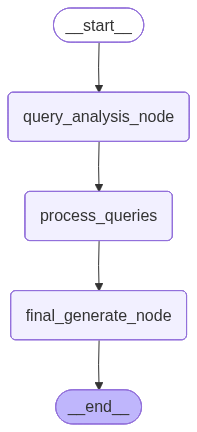

In [5]:
display(Image(final_executor.get_graph().draw_mermaid_png()))

In [6]:
# query = "Anh thấy bên cửa hàng sellPhoneS có chính sách bảo hành laptop khá là ok không biết bên em chính sách bảo hành như thế nào nhỉ"

result =await rag_executor.ainvoke(
    {'query': query,
     "chat_history": "",
     "need_rewrite": True  # Thêm dòng này để kích hoạt rewrite
    }
)

Danh sách các sản phẩm laptop chơi game tốt.
[Document(id='341521a8-9af7-4fad-b4de-5e94d04b428c', metadata={'chunk_id': 89}, page_content='>> Có thể bạn quan tâm:\n Laptop Gaming Acer Aspire 7 A715-76G-59MW NH.QMYSV.001 Laptop Acer Aspire 7 A715-76-728X NH.QGESV.008 Laptop Gaming Acer Aspire 7 A715-76G-5806 NH.QMFSV.002'), Document(id='fc68ffac-004a-497e-85c8-060435180fbd', metadata={'chunk_id': 38}, page_content='Thiết kế kim loại bền chắc Chiếc laptop gaming Acer này mang thiết kế tối giản, hiện đại với tone màu đen Titanium Black, mặt A và C bằng kim loại chắc chắn, độ dày khoảng 22.7 mm và trọng lượng chỉ 2.07 kg. Máy không hầm hố như những chiếc laptop gaming cùng tầm giá, đủ gọn gàng để bạn mang đi học, đi làm mà vẫn giữ phong thái chuyên nghiệp. Bàn phím RGB một vùng với 15 mức màu tùy chỉnh vừa đủ để tạo điểm nhấn cá nhân, không gây rối mắt. Layout phím rộng rãi, hành trình phím thoải mái cùng cụm phím số riêng, hỗ trợ tốt cho nhập liệu, lập trình hay chơi game. Nhìn chung, Ace

In [7]:
for key, vl in result.items():
    print(f"{key}: {vl}\n")

query: sản phẩm laptop chơi game ngon

rewrited_query: Danh sách các sản phẩm laptop chơi game tốt.

reason_for_rewrite: Câu hỏi gốc sử dụng từ ngữ khẩu ngữ 'ngon', được viết lại thành 'tốt' để mang tính chuyên nghiệp và giúp việc tìm kiếm trong Vector Database hiệu quả hơn, đồng thời xác định rõ mục tiêu là tìm kiếm danh sách sản phẩm laptop chơi game.

reason_for_routing: Câu hỏi yêu cầu cung cấp danh sách các sản phẩm laptop theo nhu cầu chơi game, liên quan đến thông tin về đặc điểm, cấu hình và đánh giá của sản phẩm nên cần truy cập vào collection laptop.

need_rewrite: False

routing_decision: laptop

retrived_docs: [Document(id='341521a8-9af7-4fad-b4de-5e94d04b428c', metadata={'chunk_id': 89}, page_content='>> Có thể bạn quan tâm:\n Laptop Gaming Acer Aspire 7 A715-76G-59MW NH.QMYSV.001 Laptop Acer Aspire 7 A715-76-728X NH.QGESV.008 Laptop Gaming Acer Aspire 7 A715-76G-5806 NH.QMFSV.002'), Document(id='fc68ffac-004a-497e-85c8-060435180fbd', metadata={'chunk_id': 38}, page_conten

In [8]:
answer = result["subquery_answers"]
for idx, ele in enumerate(answer):
    for key, val in ele.items():
        print(f"key : {key}  value : {val}\n")

key : type  value : text

key : text  value : Chào bạn, tôi là trợ lý bán hàng của **An Khang Computer**. Dựa trên nội dung bạn cung cấp, tôi xin giới thiệu đến bạn các mẫu laptop chơi game "ngon", đáp ứng tốt nhu cầu giải trí và làm việc hiện có tại cửa hàng chúng tôi:

1.  **Gigabyte AORUS 15 9MF-E2VN583S (Lựa chọn hiệu năng cao):**
    *   **Đặc điểm:** Đây là dòng máy chuyên game với màn hình cực kỳ mượt mà lên đến **360Hz**.
    *   **Cấu hình:** CPU Intel Core i5-12500H, card đồ họa **NVIDIA GeForce RTX 4050 6GB**, RAM DDR5 và SSD PCIe Gen4.
    *   **Ưu điểm:** Pin dung lượng lớn 99Wh, thiết kế cá tính, bàn phím RGB 3 vùng, phù hợp cho cả chơi game nặng và sáng tạo nội dung.

2.  **Acer Gaming Aspire 5 A515-58GM-53CM (Lựa chọn phổ thông giá tốt):**
    *   **Giá khuyến mãi:** 17.490.000 VNĐ.
    *   **Cấu hình:** Intel Core i5-13420H, card đồ họa **RTX 2050 4GB**, màn hình 15.6 inch FHD IPS **144Hz**.
    *   **Ưu điểm:** Thiết kế mỏng nhẹ, tản nhiệt tiên tiến, phù hợp cho các t

In [9]:
docs = result.get('retrived_docs', [])
for i, doc in enumerate(docs):
    print(f"Document {i+1}: {doc}\n")

Document 1: page_content='>> Có thể bạn quan tâm:
 Laptop Gaming Acer Aspire 7 A715-76G-59MW NH.QMYSV.001 Laptop Acer Aspire 7 A715-76-728X NH.QGESV.008 Laptop Gaming Acer Aspire 7 A715-76G-5806 NH.QMFSV.002' metadata={'chunk_id': 89}

Document 2: page_content='Thiết kế kim loại bền chắc Chiếc laptop gaming Acer này mang thiết kế tối giản, hiện đại với tone màu đen Titanium Black, mặt A và C bằng kim loại chắc chắn, độ dày khoảng 22.7 mm và trọng lượng chỉ 2.07 kg. Máy không hầm hố như những chiếc laptop gaming cùng tầm giá, đủ gọn gàng để bạn mang đi học, đi làm mà vẫn giữ phong thái chuyên nghiệp. Bàn phím RGB một vùng với 15 mức màu tùy chỉnh vừa đủ để tạo điểm nhấn cá nhân, không gây rối mắt. Layout phím rộng rãi, hành trình phím thoải mái cùng cụm phím số riêng, hỗ trợ tốt cho nhập liệu, lập trình hay chơi game. Nhìn chung, Acer đã thành công trong việc tạo ra một chiếc laptop gaming đa dụng, cân bằng hoàn hảo giữa hiệu năng mạnh mẽ và ngoại hình gọn gàng cho công việc hàng ngày.'

In [13]:
from src.agent.nodes import RAGNodes
from src.agent.model import RAGState

rag_nodes = RAGNodes()
rag_state: RAGState = {
        "query": "ANh tên là Đức đẹp trai năm nay 24 tuổi nhà ở Hà nội anh 24 tuổi nên muốn tìm 1 cái laptop chơi game khỏe giá trung bình",
        "chat_history": [],
        "rewrited_query": "",
        "reason_for_rewrite": "",
        "reason_for_routing": "",
        "need_rewrite": True,
        "routing_decision": "",
        "retrived_docs": [],
        "reranked_docs": [],
        "subquery_answers": ""
    }

In [14]:
query = "ANh tên là Đức đẹp trai năm nay 24 tuổi nhà ở Hà nội anh 24 tuổi nên muốn tìm 1 cái laptop chơi game khỏe giá trung bình"

rewrite_node = rag_nodes.query_rewrite_node(state=rag_state)

In [15]:
for key, val in rewrite_node.items():
    print(f"{key}: {val}\n")

query: ANh tên là Đức đẹp trai năm nay 24 tuổi nhà ở Hà nội anh 24 tuổi nên muốn tìm 1 cái laptop chơi game khỏe giá trung bình

chat_history: []

rewrited_query: Tìm laptop chơi game cấu hình khỏe, giá trung bình

reason_for_rewrite: Loại bỏ các thông tin không cần thiết như tên, tuổi, địa chỉ, và chỉ giữ lại yêu cầu chính là tìm laptop chơi game có cấu hình khỏe và giá trung bình để truy vấn Vector Database.

reason_for_routing: 

need_rewrite: False

routing_decision: 

retrived_docs: []

reranked_docs: []

subquery_answers: 



In [9]:
from google import genai

client = genai.Client()



In [ ]:
content = """Bạn là một chuyên gia viết lại câu hỏi (query rewriting) cho hệ thống chatbot sử dụng Vector Database.
Mục tiêu:
- Viết lại câu hỏi của người dùng thành một câu hỏi **độc lập, rõ ràng, đầy đủ ngữ cảnh**
- Câu hỏi sau khi viết lại phải **có thể dùng trực tiếp để truy vấn Vector Database**
- Câu hỏi viết lại phải ngắn gọn nhưng giữ nguyên ý định ban đầu của người dùng, **không thêm thông tin mới, không suy đoán**
Yêu cầu bắt buộc:
1. Phải sử dụng thông tin từ lịch sử hội thoại nếu có để làm rõ ngữ cảnh.
2. Loại bỏ các đại từ mơ hồ như: "nó", "cái đó", "ở trên", "mẫu này", loại bỏ thông tin dư thừa không cần thiết của câu hỏi.
3. Nếu thiếu thông tin quan trọng trong hội thoại → giữ nguyên mức thông tin hiện có, không tự bổ sung.
4. Viết ngắn gọn, rõ ràng, đúng trọng tâm.
5. Trả lời bằng **Tiếng Việt**.
----------------
Ví dụ 1:
Câu hỏi cần viết lại:
"Anh thấy bên cửa hàng sellPhoneS có chính sách bảo hành laptop khá là ok không biết bên em chính sách bảo hành như thế nào nhỉ?"
Câu hỏi sau khi viết lại:
"Chính sách bảo hành của cửa hàng như thế nào?"
----------------
Ví dụ 2:
Lịch sử hội thoại:
User: Laptop ASUS Vivobook có bảo hành bao lâu?
Assistant: Sản phẩm này được bảo hành 24 tháng.
Câu hỏi cần viết lại:
"Nếu lỗi thì đổi thế nào?"
Câu hỏi sau khi viết lại:
"Chính sách đổi trả áp dụng cho laptop ASUS Vivobook khi bị lỗi như thế nào?"
----------------
Câu hỏi cần viết lại:
{query}"""
query = "Anh thấy bên cửa hàng sellPhoneS có chính sách bảo hành laptop khá là ok không biết bên em chính sách bảo hành như thế nào nhỉ"


'Bạn là một chuyên gia viết lại câu hỏi (query rewriting) cho hệ thống chatbot sử dụng Vector Database.\nMục tiêu:\n- Viết lại câu hỏi của người dùng thành một câu hỏi **độc lập, rõ ràng, đầy đủ ngữ cảnh**\n- Câu hỏi sau khi viết lại phải **có thể dùng trực tiếp để truy vấn Vector Database**\n- Câu hỏi viết lại phải ngắn gọn nhưng giữ nguyên ý định ban đầu của người dùng, **không thêm thông tin mới, không suy đoán**\nYêu cầu bắt buộc:\n1. Phải sử dụng thông tin từ lịch sử hội thoại nếu có để làm rõ ngữ cảnh.\n2. Loại bỏ các đại từ mơ hồ như: "nó", "cái đó", "ở trên", "mẫu này", loại bỏ thông tin dư thừa không cần thiết của câu hỏi.\n3. Nếu thiếu thông tin quan trọng trong hội thoại → giữ nguyên mức thông tin hiện có, không tự bổ sung.\n4. Viết ngắn gọn, rõ ràng, đúng trọng tâm.\n5. Trả lời bằng **Tiếng Việt**.\n----------------\nVí dụ 1:\nCâu hỏi cần viết lại:\n"Anh thấy bên cửa hàng sellPhoneS có chính sách bảo hành laptop khá là ok không biết bên em chính sách bảo hành như thế nào nh

In [11]:
response = client.models.generate_content(
    model="gemini-3-flash-preview",
    contents=content.format(query= query),
)

print(response.text)

Câu hỏi sau khi viết lại:
"Chính sách bảo hành của cửa hàng như thế nào?"


In [15]:
from langchain_google_genai import ChatGoogleGenerativeAI
from src.config import GOOGLE_API_KEY, REWRITE_MODEL
from src.prompts.rag_prompts import REWRITE_PROMPT
from langchain_core.prompts import ChatPromptTemplate
from src.agent.model import QueryRewrite


In [16]:
rewrite_llm = ChatGoogleGenerativeAI(model= REWRITE_MODEL,
                        max_tokens=None,
                        api_key= GOOGLE_API_KEY)
rewrite_chain = ChatPromptTemplate.from_template(REWRITE_PROMPT) | rewrite_llm.with_structured_output(QueryRewrite)

In [17]:
result = rewrite_chain.invoke({
    'query' : query,
    'chat_history': ""
})
print(result)

rewrited_query='Tìm laptop chơi game cấu hình khỏe, giá trung bình' reasoning="Câu hỏi gốc chứa thông tin cá nhân không cần thiết cho việc tìm kiếm sản phẩm (tên, tuổi, địa chỉ). Thông tin quan trọng nhất là nhu cầu tìm 'laptop chơi game khỏe' với 'giá trung bình' đã được giữ lại và làm rõ."


In [ ]:
async def hihi():
    result = await print("hihi")

async def helo():
    result = hihi()
    # result = await hihi()
    return 0